<a href="https://colab.research.google.com/github/slightlyartistic/data-mining/blob/main/Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

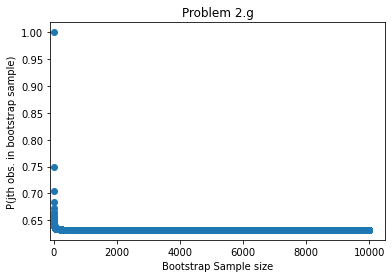

In [ ]:
# Import packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# Import dataset sheet PB2
p2df = pd.read_excel('House_Prices_PRED.xlsx', 'PB2')

# Test view
p2df.head(10)



,Id,SalePrice,SalePrice_MP
0,1,208500,207439.62
1,2,181500,174829.19
2,3,223500,219431.19
3,4,140000,167653.84
4,5,250000,282350.02
5,6,143000,145771.16
6,7,307000,276864.60
7,8,200000,213099.22
8,9,129900,114120.95
9,10,118000,130510.38


In [ ]:
# Define observed value
y = p2df['SalePrice_MP']
y_true = y = p2df['SalePrice_MP']

# Define predicted value
x = p2df[['SalePrice']]
y_pred = p2df[['SalePrice']]

# Add constant to precited value
x = sm.add_constant(x)

# Fit linear regression model
model = sm.OLS(y,x).fit()

# Calculate summed square error
sse = np.sum((model.fittedvalues - p2df.SalePrice_MP)**2)

# Calculate mean squared error
mse = mean_squared_error(y_true, y_pred)

# Print sse value
print('SSE =', sse)

# Print mse value
print('MSE =', mse)



SSE = 790719291920.913
MSE = 663427387.3351535


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# Calculate R^2 value
rSqrd = r2_score(y_true, y_pred)

# Print R^2 value
print('R^2 =', rSqrd)

R^2 = 0.8730838225766369


In [ ]:
# Reset imported dataset sheet PB2
p2df = pd.read_excel('House_Prices_PRED.xlsx', 'PB2')
p2df.head(10)

,Id,SalePrice,SalePrice_MP
0,1,208500,207439.62
1,2,181500,174829.19
2,3,223500,219431.19
3,4,140000,167653.84
4,5,250000,282350.02
5,6,143000,145771.16
6,7,307000,276864.60
7,8,200000,213099.22
8,9,129900,114120.95
9,10,118000,130510.38


In [ ]:
# Calculate the sum squared error
error = (p2df['SalePrice'] - p2df['SalePrice_MP']) ** 2
sse = np.sum(error)

# Calculate the average squared error
if len(p2df) != 0:
    ase = sse / len(p2df)
else:
    ase = 0

# Print the results
print("Sum Squared Error:", sse)
print("Average Squared Error:", ase)

Sum Squared Error: 968603985509.3241
Average Squared Error: 663427387.3351535


In [ ]:
# Calculate R^2 value
rSqrd = r2_score(y_true, y_pred)

# Print R^2 value
print('R^2 =', rSqrd)

In [ ]:
# Calculate the absolute percentage error
error = np.abs(p2df['SalePrice'] - p2df['SalePrice_MP']) / p2df['SalePrice']

# Calculate the mean absolute percentage error
mape = 100 * error.mean()

# Print the result
print("Mean Absolute Percentage Error:", mape, "%")

Mean Absolute Percentage Error: 8.14515526875231 %


In [ ]:
# Calculate the absolute error
aerror = np.abs(p2df['SalePrice'] - p2df['SalePrice_MP'])

# Calculate the mean absolute error
mae = aerror.mean()

# Print the result
print("Mean Absolute Error:", mae)

Mean Absolute Error: 14368.025828767124


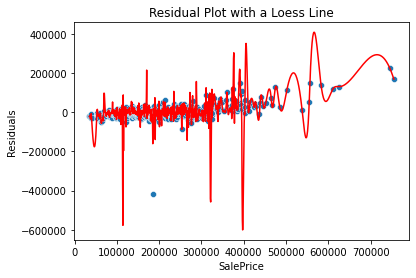

In [ ]:
# Using interp1d to create residual plot
import seaborn as sns 
from scipy.interpolate import interp1d


# Calculate the residuals
p2df['residuals'] = p2df['SalePrice'] - p2df['SalePrice_MP']

# Plot the residuals
sns.scatterplot(x='SalePrice', y='residuals', data=p2df)


# Sort the data and drop duplicates
p2df = p2df.sort_values('SalePrice').drop_duplicates('SalePrice')

# Fit a loess line to the residuals
x = p2df['SalePrice'].values
y = p2df['residuals'].values
loess = interp1d(x, y, kind='cubic')
x_fit = np.linspace(x.min(), x.max(), 1000)
y_fit = loess(x_fit)
plt.plot(x_fit, y_fit, 'r')

# Add labels and title to the plot
plt.xlabel('SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot with a Loess Line')

# Show the plot
plt.show()

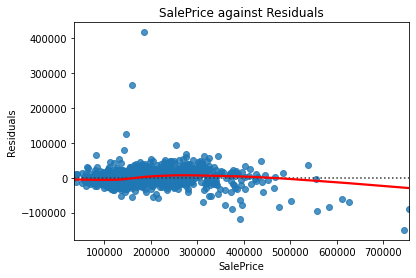

In [ ]:
# Get residuals
X = p2df['SalePrice']
y = p2df['SalePrice_MP']
p2df['Residuals'] = y - X
p2df['Residuals']

sns.residplot(data = p2df, x = 'SalePrice', y = 'Residuals', lowess = True, line_kws={'color': 'red'})
plt.title('SalePrice against Residuals')
plt.xlabel('SalePrice')
plt.ylabel('Residuals')
plt.show()

In [ ]:
# Import sheet PB3 from dataset
df = pd.read_excel('House_Prices_PRED.xlsx', 'PB3')

# Read dataset
df

,Id,SalePrice,SalePrice_MP,MSZoning,FireplaceQu,GAR,BATH,Age,TSF
0,1,208500,207439.62,RL,NaN,548,2.5,5,1710
1,2,181500,174829.19,RL,TA,460,2.0,31,1262
2,3,223500,219431.19,RL,TA,608,2.5,7,1786
3,4,140000,167653.84,RL,Gd,642,1.0,91,1717
4,5,250000,282350.02,RL,TA,836,2.5,8,2198
...,...,...,...,...,...,...,...,...,...
1455,1456,175000,171836.32,RL,TA,460,2.5,8,1647
1456,1457,210000,207697.04,RL,TA,500,2.0,32,2073
1457,1458,266500,253549.21,RL,Gd,252,2.0,69,2340
1458,1459,142125,143850.93,RL,NaN,240,1.0,60,1078


In [ ]:
# Get residuals
X = df['SalePrice']
y = df['SalePrice_MP']
df['Residuals'] = y - X
df['Residuals']

0       -1060.38
1       -6670.81
2       -4068.81
3       27653.84
4       32350.02
          ...   
1455    -3163.68
1456    -2302.96
1457   -12950.79
1458     1725.93
1459     5184.65
Name: Residuals, Length: 1460, dtype: float64

/usr/local/lib/python3.8/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


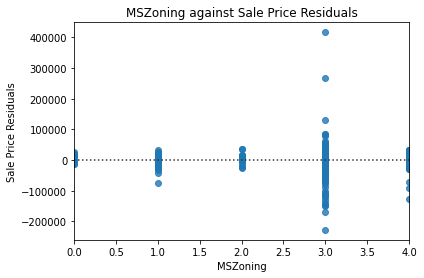

In [ ]:
# Replace categorical variables with numbers to make plotting possible
df['MSZoning'].replace(['C', 'FV', 'RH', 'RL', 'RM'], [0, 1, 2, 3, 4], inplace = True)

# Plot residual plot
sns.residplot(data = df, x = 'MSZoning', y = 'Residuals', lowess = True, line_kws={'color': 'red'})
plt.title('MSZoning against Sale Price Residuals')
plt.xlabel('MSZoning')
plt.ylabel('Sale Price Residuals')
plt.show()

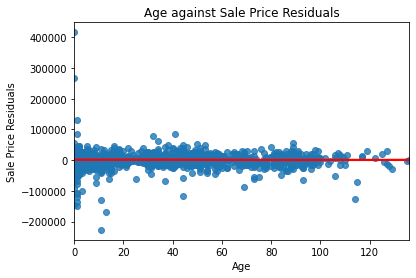

In [ ]:
# Plot residual plot
sns.residplot(data = df, x = 'Age', y = 'Residuals', lowess = True, line_kws={'color': 'red'})
plt.title('Age against Sale Price Residuals')
plt.xlabel('Age')
plt.ylabel('Sale Price Residuals')
plt.show()